# Lesson 2

## 随堂练习

已知S = "s,pa,m,@,bnu,dot,edu,dot,cn"

将其转换为邮件地址，并提取出用户名和邮件域名

In [2]:
S = "s,pa,m,@,bnu,dot,edu,dot,cn"

S_new = S.replace('dot','.').replace(',','')
user = S_new.split('@')[0]
ip = S_new.split('@')[1]

print('转换后的邮件地址为:{}'.format(S_new))
print('用户名为:{},邮件域名为:{}'.format(user,ip))

转换后的邮件地址为:spam@bnu.edu.cn
用户名为:spam,邮件域名为:bnu.edu.cn


格式化输出

In [2]:
# 对输出的字符串进行格式设置（主要是拼接）
age = 20
name = 'Tom'
print(name,'was',age,'years old.')# 不要求类型相同，且自动空格
print(name + ' was ' + str(age) + ' years old.') # 要求类型相同，不会自动空格（需要字符串自带）
print('{0} was {1} years old.'.format(name,age))

Tom was 20 years old.
Tom was 20 years old.
Tom was 20 years old.


In [ ]:
# 对输出的数字进行格式设置
print(1.0/3)
print('%6.3f' %(1./3)) # %表示格式定义,6表示总长,3表示小数位，f表示浮点数
print('{0:.3f}'.format(1./3)) # 0表示输出的第一个变量

0.3333333333333333
 0.333
0.333


In [ ]:
# format格式
print('{:.2f}'.format(3.14))# 保留小数点后两位
print('{:+.2f}'.format(-1))# 带符号保留小数点后两位
print('{:.0f}'.format(2.71828))# 不带小数（四舍五入）,用法类似round函数
print(round(2.71828))

print('{:0>2d}'.format(5))# 在数字左边填充零使满足长度为2
print('{:x<4d}'.format(5))# 在数字右边填充x使满足长度为5
print('{:>10d}'.format(13))# 在左侧填充空格使满足长度为13
print('{:^10d}'.format(13))# 中间对齐

print('{:,}'.format(1000000))# 用逗号隔开
print('{:.2%}'.format(0.25))# 百分比格式
print('{:.2e}'.format(1000000000))# 科学计数法

# 总结： . 之后都表示小数的限制

3.14
-1.00
3
3
05
5xxx
1,000,000
25.00%
1.00e+09
        13
    13    


## 课堂练习1：赤经赤纬的表示方法变换
赤经坐标有时分秒和角度两种表示方式，而角度有时分秒和小数点的时两种表示方式。

赤经：1h $\longrightarrow$ $15^{\circ}$   hms .
赤纬：dms .

M31 : 00h42m44.3s   +41d16m09s

点评：一定要小心赤经赤纬的转换运算方式上的不同！

In [9]:
RA = '00h42m44.3s'
DEC = '-41d16m09s'

def caref(a,b,c):
    if a < 0 :
        b = -b ; c = -c
    return a,b,c

def trans(RA,DEC):

    RA_h = float(RA.split('h')[0])
    RA_m = float(RA.split('h')[1].split('m')[0])
    RA_s = float(RA.split('h')[1].split('m')[1].split('s')[0])

    RA_h,RA_m,RA_s = caref(RA_h,RA_m,RA_s)

    RA_degree = ( RA_h + RA_m / 60 + RA_s / 3600 ) * 15

    DEC_d = float(DEC.split('d')[0])
    DEC_m = float(DEC.split('d')[1].split('m')[0])
    DEC_s = float(DEC.split('d')[1].split('m')[1].split('s')[0])

    DEC_d,DEC_m,DEC_s = caref(DEC_d,DEC_m,DEC_s)

    DEC_degree = DEC_d + DEC_m / 60 + DEC_s /3600

    return RA_degree,DEC_degree



print('转换后的赤经:{}、赤纬:{}'.format(trans(RA,DEC)[0],trans(RA,DEC)[1]))

转换后的赤经:10.684583333333332、赤纬:-41.26916666666666


In [ ]:
# 将赤经赤纬转换成角度值
# 赤经赤纬
ra = '00h42m44.3s'
dec = '+41d16m09s'

# 提取赤经赤纬中各个值
ra_h = float(ra.split('h')[0])
ra_m = float(ra.split('h')[1].split('m')[0])
ra_s = float(ra.split('h')[1].split('m')[1].split('s')[0])

# 赤纬值的转换
dec_d = float(dec.split('d')[0])
dec_m = float(dec.split('d')[1].split('m')[0])
dec_s = float(dec.split('d')[1].split('m')[1].split('s')[0])

# 赤经赤纬是正/负值时处理方法不一致
def ang(s1,s2,s3):
    if s1 >= 0:
        angl = s1 + s2 / 60 + s3 / 3600
    else:
        angl = s1 - s2 / 60 - s3 /3600        
    return angl

# 计算成角度
ang_ra = ang(ra_h,ra_m,ra_s) * 15
print('赤经转化为角度为：'+'{:.4f}'.format(ang_ra) + '°')

# 计算转换成时分秒
ang_dec = ang(dec_d,dec_m,dec_s)
print('赤纬转化为角度为：'+'{:.4f}'.format(ang_dec) + '°') # 这个需要学习

赤经转化为角度为：10.6846°
赤纬转化为角度为：-41.2692°


In [ ]:
# 将角度转换成时分秒
ra = 83.633212
dec = 22.014460

# 赤经转换
ra_h = int(ra/15)
ra_m = int((ra/15-ra_h)*60)
ra_s = (ra/15-ra_h-ra_m/60)*3600
print('赤经为'+str(ra_h)+'h'+str(ra_m)+'m'+str('{:.4f}'.format(ra_s))+'s')

# 赤纬转换
dec_h = int(dec) #可以用整除、取余代替
dec_m = int((dec-dec_h)*60)
dec_s = (dec-dec_h-dec_m/60)*3600
print('赤纬为'+str(dec_h)+'h'+str(dec_m)+'m'+str('{:.4f}'.format(dec_s))+'s')

赤经为5h34m31.9709s
赤经为22h0m52.0560s


In [17]:
# 整除、取余标准方法一：
ra = 83.633212
dec = 22.014460

# 赤经转换
ra_h = ra // 15
ra_m = ra % 15 * 60 //15
ra_s = ra % 15 * 60 % 15 * 60 / 15
print('赤经为'+'{:.0f}'.format(ra_h)+'h'+'{:.0f}'.format(ra_m)+'m'+str('{:.4f}'.format(ra_s))+'s')# 用format格式不用先转为str再format

# 赤纬转换
dec_h = dec // 1
dec_m = dec % 1 * 60 // 1
dec_s = dec % 1 * 60 % 1 * 60 
print('赤纬为'+'{:.0f}'.format(dec_h)+'h'+'{:.0f}'.format(dec_m)+'m'+str('{:.4f}'.format(dec_s))+'s')

赤经为5h34m31.9709s
赤纬为22h0m52.0560s


In [ ]:
# 整除、取余标准方法二：
ra = 83.633212
dec = 22.014460

# 赤经转换
ra = ra / 15
ra_h = ra // 1
ra_m = ra % 1 * 60 // 1
ra_s = ra % 1 * 60 % 1 * 60
print('赤经为'+'{:.0f}'.format(ra_h)+'h'+'{:.0f}'.format(ra_m)+'m'+str('{:.4f}'.format(ra_s))+'s')# 用format格式不用先转为str再format

赤经为5h34m31.9709s


赋值
变量名：字母、数字、下划线组成，不能以数字开头，注意区分大小写！

In [ ]:
a = 1 ; b = 2
c = a ; a = b ; b = c 
a,b = b,a# 仍然按顺序进行赋值
print(a,b,c)

1 2 1


结构控制——判断

In [21]:
x = 2
if x > 2:
    print('x>2')
elif x < 2 :
    print('x<2')
else:
    print('x=2')
    print(x+1)
print(x)

x=2
3
2


for 循环 : 已知循环次数

In [ ]:
# for,while循环注意在终端里要注意空格

for i in [2,3,5,7]:
    print(i)

for i in range(5):# 从0-4
    print(i)
print(i)


for i in range(5):
    print(i,'before break')
    break  # 退出循环
    print(i,'after break')

for i in range(5):
    print(i,'before conti')
    continue  # 跳过下面的内容，行下一个循环
    print(i,'after conti')


2
3
5
7
0
1
2
3
4
4
0 before break
0 before conti
1 before conti
2 before conti
3 before conti
4 before conti


while循环 ： 未知循环次数

In [1]:
i = 0
while i < 5:
    print(i)
    i = i + 1
print(i)

i = 0
while 0 :# 循环永远不会执行
    print(i)
# while 1 :# 循环无限循环
#     print(i)



0
1
2
3
4
5


定义函数

In [ ]:
def add(a,b):
    print(a+b)
c = add(1,2)
print(c)

3
None


易犯错误：
1.缩进indent错误（尤其是终端）
2.语法错误（判断，循环，定义函数都要有冒号syntax）

## 练习1：最大公约数（辗转相除法）

求8191和9689的公约数

In [11]:
# 法一：
a = 8191
b = 9689
c = 0
while a%b != 0:
    c = a%b
    a = b
    b = c

print('最大公约数为:'+str(b))


最大公约数为:1


In [10]:
# 法二：
def gcd(a,b):
    while a!=0:
        a,b = b%a,a
    return b
print(gcd(8191,9689))

1


In [7]:
# 法三：
def gcd(x,y):
    mod = x % y
    if mod:
        return gcd(y,mod)
    else:
        return y
print(gcd(278,160))

2


## 练习2：数值解方程

求解超越方程$2^x = 3x$的解

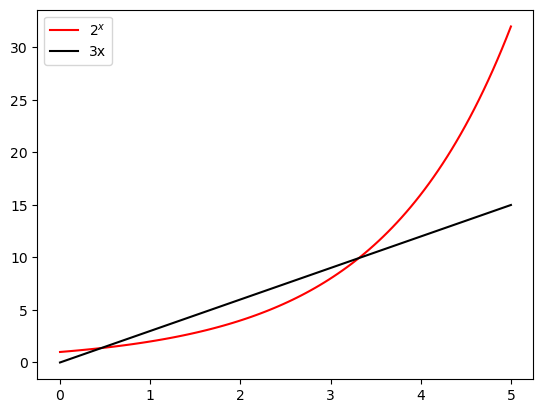

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.linspace(0,5,n)
plt.figure()
plt.plot(x,2**x,'r-',label = '$2^x$')
plt.plot(x,3*x,'k-',label='3x')
plt.legend(loc = 0) # 一定要写loc =
plt.show()

In [31]:
n = 1000
x = np.linspace(0,5,n)

dev = 1
dev_pra = np.abs(2 ** x - 3 * x)
x_pre = 0
for i in range(n):
    if dev_pra[i] < dev:
        dev = dev_pra[i]
        x_pre = x[i]

print('{:.3f}'.format(x_pre))

3.313


In [25]:
# 精度：三位小数
wall  = 1
for i in range(0,100):# 必须是整数
    x = i/100
    dif = abs(2**x - 3*x)
    if wall >dif:
        wall = dif
        x_0 = x

print(wall,x_0)

0.004458181860256261 0.46


## 练习：闰月设置

In [ ]:
dif = 365.242190 -12 * 29.530588
print(dif)

day_year = 365.242190

10.875133999999946


- 作业：鲍尔默面试题

我在心里选择一个 1 到 100 之间的整数，你来猜这个数字。每次猜完，我会告诉你，答案比你猜的大还是小。如果猜错，你可以接着猜，直到猜中为止。
如果你只用一次就猜中，我给你 5 美元，用两次猜中我给你 4 美元，三次 3 美元，四次 2 美元，五次 1 美元，六次 0 美元。
你还是没猜中的话，就要倒贴钱了。七次猜中，你给我 1 美元，八次 2 美元，九次 3 美元。
请问你应该玩这个游戏吗？

In [41]:
import random
n = 1
num_min = 0
num_max = 101
ans = random.randint(num_min + 1,num_max - 1)
guess = random.randint(num_min + 1,num_max - 1)
print('我的答案是:' + str (ans))
while ans != guess:
    if ans > guess:
        print('您猜小了')
        num_min = guess
        print('第{}次，您猜的是{}'.format(n,guess))
        guess = random.randint(guess + 1,num_max - 1)
        n += 1
        
        
    if ans < guess:
        print('您猜大了')
        num_max = guess
        print('第{}次，您猜的是{}'.format(n,guess))
        guess = random.randint(num_min + 1,guess-1)
        n += 1

print('您猜对了！')
print('第{}次，您猜的是{}'.format(n,guess))
w = 6 - n
print(w)      


我的答案是:57
您猜大了
第1次，您猜的是73
您猜大了
第2次，您猜的是65
您猜小了
第3次，您猜的是15
您猜大了
第4次，您猜的是62
您猜小了
第5次，您猜的是36
您猜小了
第6次，您猜的是44
您猜小了
第7次，您猜的是48
您猜小了
第8次，您猜的是53
您猜小了
第9次，您猜的是54
您猜小了
第10次，您猜的是56
您猜对了！
第11次，您猜的是57
-5


In [8]:
# 获胜概率最大的方法是二分法

reward = 0 # 初始化参数，非常重要!!

# 1-100内的整数都有可能为正确答案（等可能），采用遍历计算的方法
for i in range(1,101):
    start = 1
    end = 100
    n = 1  # 写循环的时候要注意参数在每次循环时是否需要重置（循环外还是循环内）
    guess = ( start + end ) //2
    while guess != i :   # 一直猜到正确位置，循环次数未知
         if guess > i :
             n = n + 1
             end = guess - 1  # 缩小寻找的范围并且避免了100无法猜到的情况
             guess = ( start + end ) //2
         if guess < i :
             n = n + 1
             start = guess + 1 # 缩小寻找的范围并且避免了100无法猜到的情况
             guess = ( start + end ) //2
    
    reward = reward + (6 - n)

print('使用二分法进行猜数时，当正确答案遍历1-100时，总的获利为：' + str(reward) )

# 判断该不该玩这个游戏
if reward > 0 :
    print('可以获利，该玩这个游戏！')
elif reward < 0 :
    print('无法获利，不该玩这个游戏！')
else :
    print('都可以！')

# 计算期望
E_reward = reward / 100
print('获利的期望值为:'+ '{:.2f}'.format(E_reward))

使用二分法进行猜数时，当正确答案遍历1-100时，总的获利为：20
可以获利，该玩这个游戏！
获利的期望值为:0.20
